In [1]:
import os

os.getcwd()

In [2]:
import numpy as np
import pandas as pd;
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# Indidiual #1's Dreams
path01 = 'data/diaries/diary01.csv'

df = pd.read_csv(path01, sep='|')
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/diaries/diary01.csv'

For each individual's dataframe, there are 7 columns:

- `Unnamed: X` : An index for each dream
- `raw_number` : Contains the date of each dream
- `Content`: Contains a description for each dream
- `negative`: Rating of how negative the content of the dream is
- `neutral`: Rating of how neutral the content of the dream is
- `positive`: Rating for how positive the content of the dream is
- `compound`: A compound score for each dream, with -1 being most negative and 1 being most positive


## Overall

In [ ]:
df_total = df
for i in range (2, 95):
    str_num = str(i).zfill(2)
    path_x = f'data/diaries/diary{str_num}.csv'
    df_x = pd.read_csv(path_x, sep='|')
    df_total = pd.concat([df_total, df_x])


In [594]:
df_total

,Unnamed: 0,raw_number,content,negative,neutral,positive,compound
0,0,#1 (1957),"The one at the Meads's house, where it's bigge...",0.010,0.948,0.041,0.6486
1,1,#2 (8/11/67),I'm at a family reunion in a large fine house ...,0.041,0.906,0.053,-0.1941
2,2,#3 (8/1/85),I watch a plane fly past and shortly realize i...,0.076,0.856,0.069,-0.1573
3,3,#4 (1985?),Me pulling the green leaves and berries off so...,0.098,0.829,0.073,-0.9523
4,4,#5 (1985?),I'm in a room that reminds me of (but definite...,0.040,0.889,0.071,0.9639
...,...,...,...,...,...,...,...
84,84,"#85 (F, age 18)",The dream was about me and my boyfriend going ...,0.059,0.807,0.133,0.8868
85,85,"#86 (F, age 18)",Two weeks ago this guy asked me to Senior Ball...,0.011,0.852,0.136,0.9201
86,86,"#87 (F, age 18)",My boyfriend just broke up with me so he was o...,0.052,0.845,0.103,0.8694
87,87,"#88 (F, age 18)",I was in my backyard and I was flying. I would...,0.038,0.886,0.076,0.2838


In [595]:
df_total['compound'].mean()


-0.011957756711260752

<AxesSubplot:xlabel='compound', ylabel='Count'>

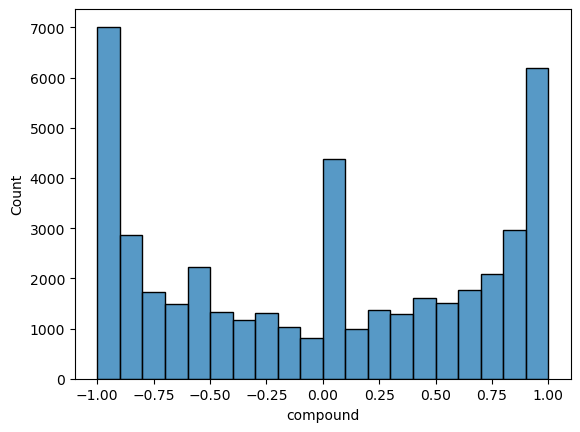

In [596]:
sns.histplot(df_total['compound'], bins = 20)

# Individual - Barb Sanders

 Lets take a look at a specific individual's dreams. We will be taking a look at Barb Sanders, a middle-aged adult woman who recorded around 4200 dreams from 1960 to 2001.


In [597]:
pathbarb1 = 'data/diaries/diary04.csv'
barb1 = pd.read_csv(pathbarb1, sep='|')
pathbarb2 = 'data/diaries/diary05.csv'
barb2 = pd.read_csv(pathbarb2, sep='|')
barb = pd.concat([barb1, barb2])
barb['Unnamed: 0'] = np.arange(4252)
barb

,Unnamed: 0,raw_number,content,negative,neutral,positive,compound
0,0,#0000 (1960-05-03),"I had the neatest dream about Blake, me, Reta ...",0.000,0.680,0.320,0.5719
1,1,#0001 (1960-05-04),I had another neat dream about Blake.,0.000,0.500,0.500,0.6124
2,2,#0002 (1960-07-16),I had a dream that Nate came back and I felt j...,0.000,0.875,0.125,0.3164
3,3,#0003 (1960-08-04),"For the second night in a row, I dreamed of Jo...",0.044,0.853,0.104,0.8513
4,4,#0004 (1960-12-02),I Didn't dream as last night before I woke up!...,0.079,0.730,0.191,0.5349
...,...,...,...,...,...,...,...
1133,4247,#4249 (2001-12-11),"[""Dream workshop.""] I am attending a dream wor...",0.089,0.791,0.120,0.8167
1134,4248,#4250 (2001-12-12),"[""I am Dad's bridesmaid.""] I am involved with ...",0.057,0.888,0.055,-0.0772
1135,4249,#4251 (2001-12-13),"[""Lila the camel.""] I am riding a two humped c...",0.066,0.914,0.020,-0.6249
1136,4250,#4252 (2001-12-13),"[""Dress size too large.""] I am in a store. The...",0.037,0.910,0.053,0.5286


In [598]:
barb['compound'].mean()

0.25205239887111947

<AxesSubplot:xlabel='compound', ylabel='Count'>

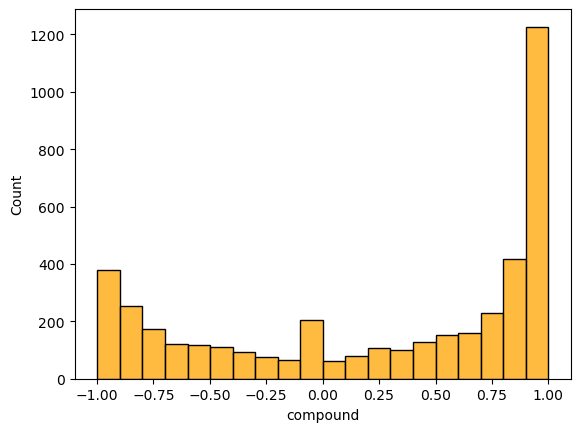

In [599]:
sns.histplot(barb['compound'], bins = 20, color = 'orange')

Here we plot Barbra's dream data on top of the overall data to take a look at if the distributions are similar. We normalize the histograms to better compare their distributions.

/Users/calwinli/miniforge3/envs/dsc80/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


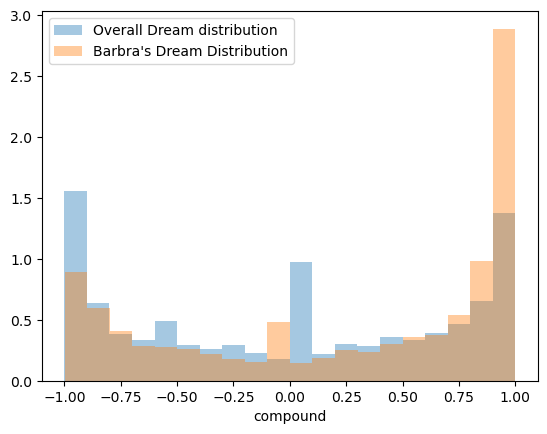

In [600]:
fig, ax = plt.subplots()
for a in [df_total['compound'], barb['compound']]:
    sns.distplot(a, bins=20, ax=ax, kde=False, norm_hist=True)
plt.legend(labels=['Overall Dream distribution', "Barbra's Dream Distribution"])


## Is Barbra's distribution different from the overall distribution?
Lets test this using the Kolmogorov-Smirnov test!

The Kolmogorov-Smirnov test measures how different two distributions are, which is perfect for what we need.

In [601]:
from scipy.stats import ks_2samp

In [602]:
ks_2samp?

Let us set an alpha value of .01 for this test

Null Hypothesis $H_0$: the two distributions are the same

Alternate Hypothesis $H_A$: the two distributions are not the same


In [ ]:
ks_2samp(df_total['compound'], barb['compound'])

KstestResult(statistic=0.1948872282159122, pvalue=8.873734269304111e-130, statistic_location=0.7549, statistic_sign=1)

Because our p-value of 8.873734269304111e-130 is less than our alpha of .01, we reject the null. It is not likely that our two distributions are the same.

## Other visualizations 


In [ ]:
# gets the date from the raw_number column for Barbra's dream records
def get_date(rawnum):
    return rawnum.split()[1][1:-1]

# gets the year from date column
def get_year(date):
    return date.split('-')[0]

# gets the month from the date column
def get_month(date):
    return date.split('-')[1]

In [ ]:
barb = barb.assign(date = barb['raw_number'].apply(get_date))
barb = barb.assign(year = barb['date'].apply(get_year))
barb = barb.assign(month = barb['date'].apply(get_month))
barb.sort_values('date')
barb = barb[~(barb['date'].str.contains('\?'))]
barb

,Unnamed: 0,raw_number,content,negative,neutral,positive,compound,date,year,month
0,0,#0000 (1960-05-03),"I had the neatest dream about Blake, me, Reta ...",0.000,0.680,0.320,0.5719,1960-05-03,1960,05
1,1,#0001 (1960-05-04),I had another neat dream about Blake.,0.000,0.500,0.500,0.6124,1960-05-04,1960,05
2,2,#0002 (1960-07-16),I had a dream that Nate came back and I felt j...,0.000,0.875,0.125,0.3164,1960-07-16,1960,07
3,3,#0003 (1960-08-04),"For the second night in a row, I dreamed of Jo...",0.044,0.853,0.104,0.8513,1960-08-04,1960,08
4,4,#0004 (1960-12-02),I Didn't dream as last night before I woke up!...,0.079,0.730,0.191,0.5349,1960-12-02,1960,12
...,...,...,...,...,...,...,...,...,...,...
1133,1133,#4249 (2001-12-11),"[""Dream workshop.""] I am attending a dream wor...",0.089,0.791,0.120,0.8167,2001-12-11,2001,12
1134,1134,#4250 (2001-12-12),"[""I am Dad's bridesmaid.""] I am involved with ...",0.057,0.888,0.055,-0.0772,2001-12-12,2001,12
1135,1135,#4251 (2001-12-13),"[""Lila the camel.""] I am riding a two humped c...",0.066,0.914,0.020,-0.6249,2001-12-13,2001,12
1136,1136,#4252 (2001-12-13),"[""Dress size too large.""] I am in a store. The...",0.037,0.910,0.053,0.5286,2001-12-13,2001,12


In [ ]:
barb['date'] =  pd.to_datetime(barb['date'], format='%Y-%m-%d')


In [ ]:
pip install calplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for calplot: filename=calplot-0.1.7.5-py3-none-any.whl size=8118 sha256=c3ab534d6a4b91b7226a3b55d5206b7131aafcaa3e3bebdcb583bd0a265c0923
  Stored in directory: /Users/calwinli/Library/Caches/pip/wheels/5d/df/bf/66802485190cac766fb1d55a4420b5f03730fa68475d401a5e
Successfully built calplot
Note: you may need to restart the kernel to use updated packages.


In [ ]:
barb = barb.set_index('date')


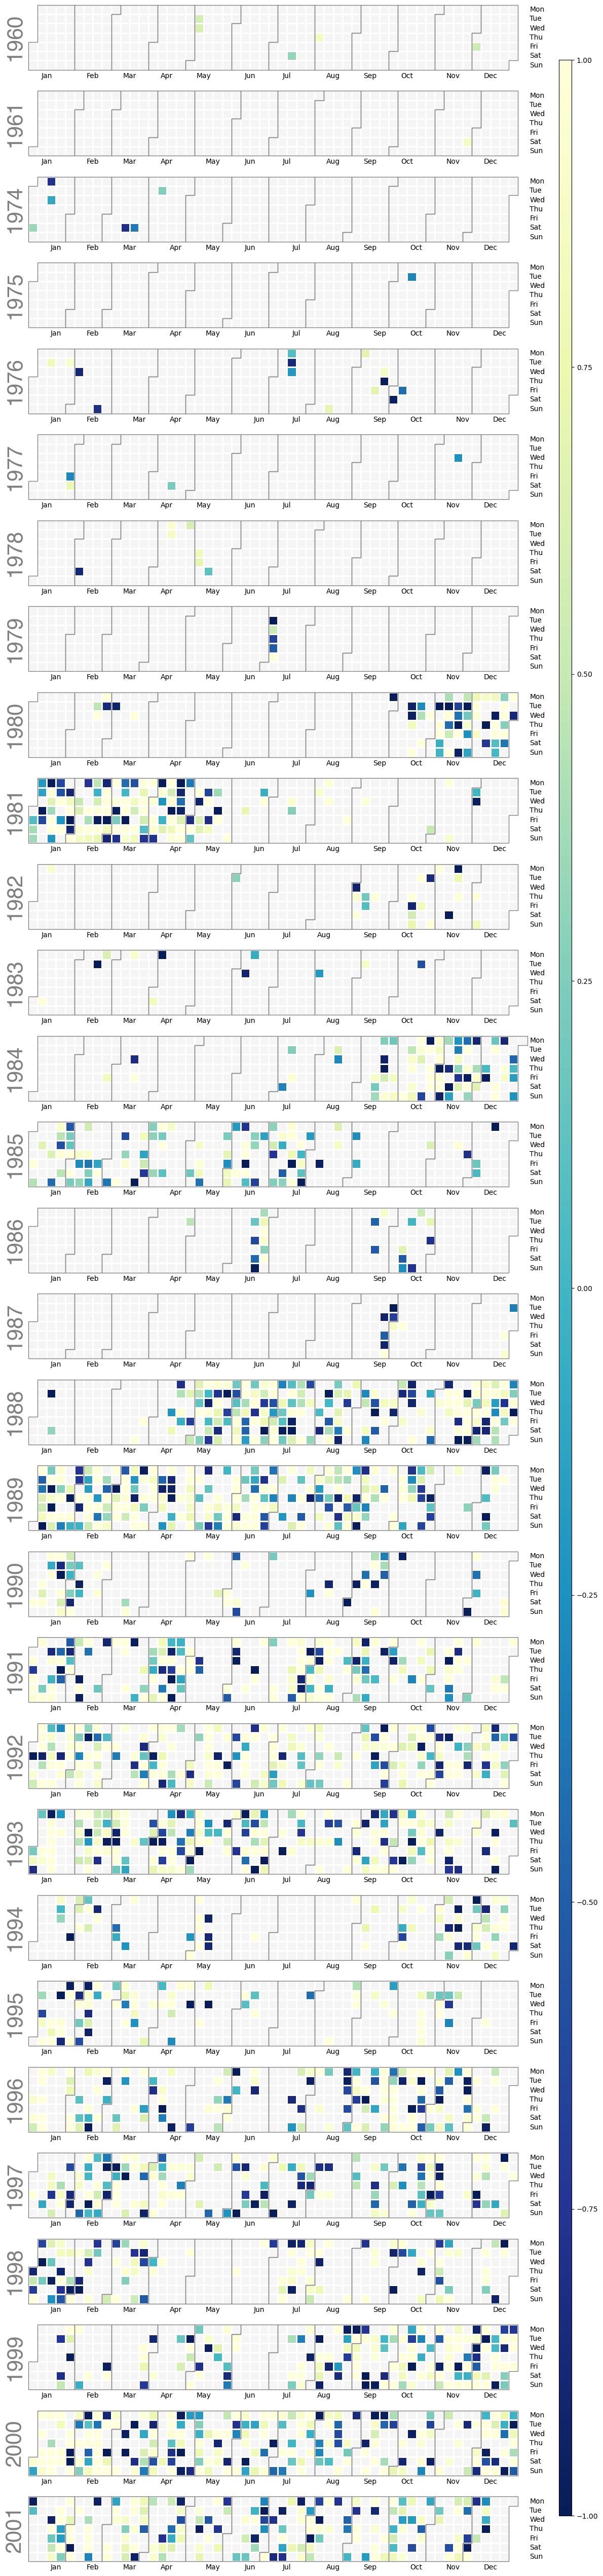

In [ ]:
import calplot
calplot.calplot(barb['compound'], cmap="YlGnBu_r", colorbar=True, vmin = -1, vmax = 1);

## Heatmap 2

In [ ]:
heatmapdata = pd.pivot_table(barb, index = 'year',  columns = 'month', aggfunc='mean')['compound']
heatmapdata

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,0.592150,NaN,0.316400,0.851300,NaN,NaN,NaN,0.534900
1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.868700,NaN
1974,-0.134750,NaN,-0.581600,0.062500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.309100,NaN,NaN
1976,0.849900,-0.849300,0.000000,NaN,NaN,NaN,-0.248125,0.690800,0.250160,-0.691200,NaN,NaN
1977,0.219550,NaN,NaN,0.226300,NaN,NaN,NaN,NaN,NaN,NaN,-0.250000,NaN
1978,NaN,-0.888100,NaN,0.790600,0.532467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979,NaN,NaN,NaN,NaN,NaN,NaN,0.016900,NaN,NaN,NaN,NaN,NaN
1980,NaN,0.293582,0.227833,NaN,NaN,NaN,NaN,NaN,-0.978200,0.292290,0.037902,0.309880


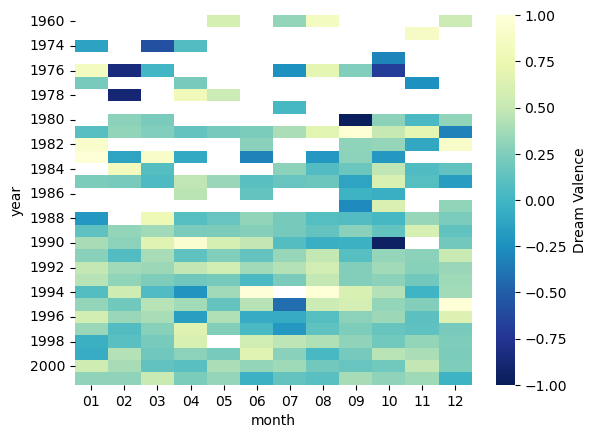

In [ ]:
sns_plot = sns.heatmap(heatmapdata, cmap="YlGnBu_r", vmin = -1, vmax = 1, cbar_kws={'label': 'Dream Valence'})

Lets take a look Barbra's mean monthly dream valences:

In [ ]:
ser_month = barb.groupby('month').mean()['compound'][:-1]


<AxesSubplot:xlabel='month'>

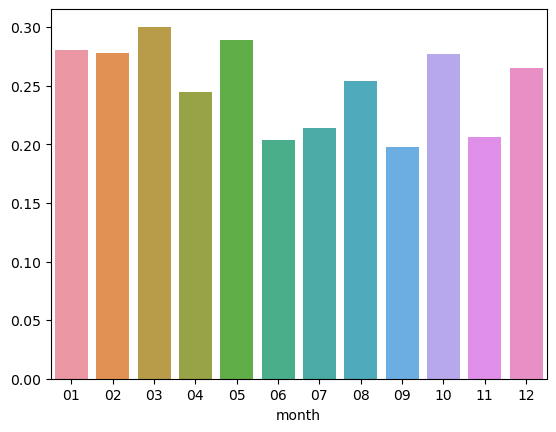

In [ ]:
sns.barplot(x = ser.index, y = ser.values)

How about by year now?

<AxesSubplot:xlabel='year'>

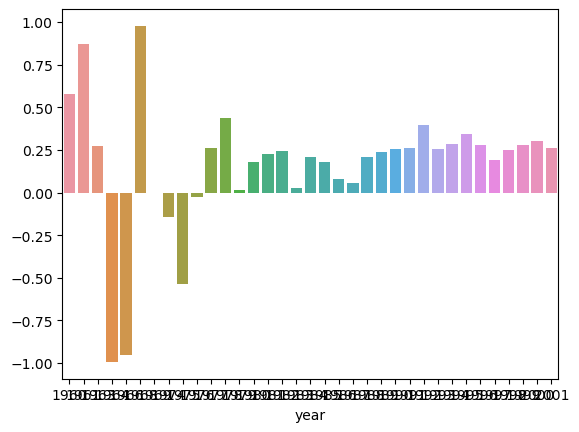

In [ ]:
ser_year = barb.groupby('year').mean()['compound']
sns.barplot(x = ser_year.index, y = ser_year.values)